In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
m = 2000
X = np.random.rand(m, 1)
y = 5 + 2*X + np.random.randn(m, 1)

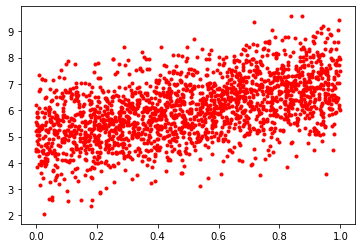

In [ ]:
plt.plot(X, y, "r.")

# Normal Equation

In [ ]:
from sklearn.preprocessing import add_dummy_feature

In [ ]:
Xnew = add_dummy_feature(X)
theta_hat = np.linalg.inv(Xnew.T @ Xnew) @ Xnew.T @ y 

In [ ]:
theta_hat

array([[4.98913418],
       [2.0605634 ]])

In [ ]:
X_test = np.array([[1.5], [2.5],[3.5]])
X_test = add_dummy_feature(X_test)
X_test @ theta_hat

array([[ 8.07997928],
       [10.14054267],
       [12.20110607]])

In [ ]:
X_test = np.array([[0], [1]])
X_test_new = add_dummy_feature(X_test)
y_pred = X_test_new @ theta_hat

In [ ]:
y_pred

array([[4.98913418],
       [7.04969758]])

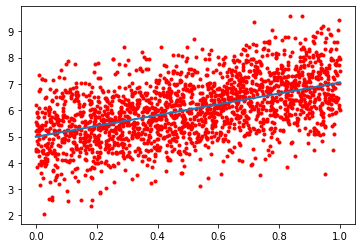

In [ ]:
plt.plot(X, y, "r.")
plt.plot(X_test, y_pred, lw=2)

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
lr = LinearRegression()
lr.fit(X, y)

LinearRegression()

In [ ]:
lr.intercept_, lr.coef_

(array([4.98913418]), array([[2.0605634]]))

In [ ]:
lr.predict(X_test)

array([[4.98913418],
       [7.04969758]])

# Batch Gradient Descent

In [ ]:
m = Xnew.shape[0]
eta = 0.1

In [ ]:
np.random.seed(40)
theta = np.random.randn(2, 1)

number_of_epochs = 1000

for epoch in range(number_of_epochs):
  grad_ = 2/m * Xnew.T @ (Xnew @ theta - y)
  theta = theta - eta*grad_

In [ ]:
theta

array([[4.98913318],
       [2.06056526]])

# Stochastic Gradient Descent

In [ ]:
def learning_rate_schedule(t):
  t0, t1 = 2, 40
  return t0 / (t + t1)

In [ ]:
np.random.seed(40)
theta = np.random.randn(2, 1)

number_of_epochs = 100

for epoch in range(number_of_epochs):
  for instance in range(m):
    random_index = np.random.randint(m)
    x_index = Xnew[random_index : random_index + 1]
    y_index = y[random_index : random_index + 1]
    grad_ = 2 * x_index.T @ (x_index @ theta - y_index)
    eta = learning_rate_schedule(epoch * m + instance)
    theta = theta - eta * grad_

In [ ]:
theta

array([[4.95150286],
       [2.13998146]])

In [ ]:
from sklearn.linear_model import SGDRegressor

In [ ]:
sgd = SGDRegressor(max_iter=1000, tol=0.0001, early_stopping=True,
             n_iter_no_change=10, random_state=40, penalty=None)

In [ ]:
sgd.fit(X, y.flatten())

SGDRegressor(early_stopping=True, n_iter_no_change=10, penalty=None,
             random_state=40, tol=0.0001)

In [ ]:
sgd.coef_

array([2.13186316])

In [ ]:
sgd.intercept_

array([4.93748973])

# Polynomial Regression

In [ ]:
np.random.seed(40)
m = 1000
X = 5 * np.random.rand(m, 1) - 4
y = 0.7 * X**2 + X + 3 + np.random.randn(m, 1)

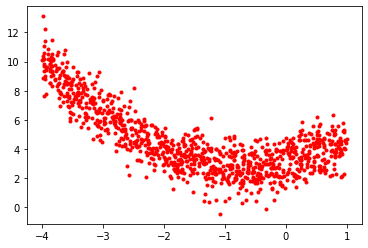

In [ ]:
plt.plot(X, y, "r.")

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

In [ ]:
polynomial_X = PolynomialFeatures(degree=2, include_bias=False)
X_polynomial = polynomial_X.fit_transform(X)

In [ ]:
X_polynomial.shape

(1000, 2)

In [ ]:
X_polynomial[0]

array([-1.96156486,  3.8477367 ])

In [ ]:
lin_reg = LinearRegression()
lin_reg.fit(X_polynomial, y)

LinearRegression()

In [ ]:
lin_reg.intercept_, lin_reg.coef_

(array([3.06380936]), array([[0.90344499, 0.66918949]]))

In [ ]:
X_new = np.linspace(-4, 1, 1000).reshape(1000, 1)
X_new_polynomial = polynomial_X.transform(X_new)
y_new = lin_reg.predict(X_new_polynomial)

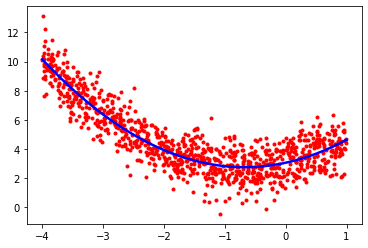

In [ ]:
plt.plot(X, y, "r.")
plt.plot(X_new, y_new, "b-", lw=2.5)

In [ ]:
from sklearn.model_selection import learning_curve

In [ ]:
train_size, train_score, validation_score = learning_curve(
    LinearRegression(), X, y,
    train_sizes=np.linspace(0.01, 1.0, 100), 
    cv = 5,
    scoring="neg_root_mean_squared_error"
)

In [ ]:
train_error = -train_score.mean(axis=1)
validation_error = -validation_score.mean(axis=1)

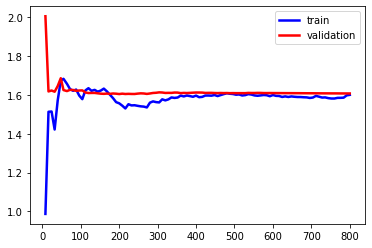

In [ ]:
plt.plot(train_size, train_error, "b-", lw=2.5, label="train")
plt.plot(train_size, validation_error, "r-", lw=2.5, label="validation")
plt.legend()

In [ ]:
from sklearn.pipeline import make_pipeline

polynomial_reg = make_pipeline(
    PolynomialFeatures(degree=2, include_bias=False),
    LinearRegression()
)

train_size, train_score, validation_score = learning_curve(
    polynomial_reg, X, y,
    train_sizes=np.linspace(0.01, 1.0, 100), 
    cv = 5,
    scoring="neg_root_mean_squared_error"
)

In [ ]:
train_error = -train_score.mean(axis=1)
validation_error = -validation_score.mean(axis=1)

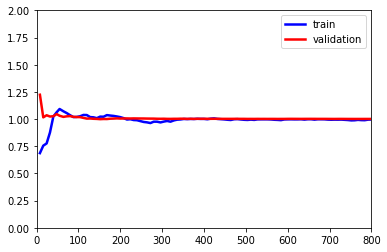

In [ ]:
plt.plot(train_size, train_error, "b-", lw=2.5, label="train")
plt.plot(train_size, validation_error, "r-", lw=2.5, label="validation")
plt.axis([0, 800, 0, 2])
plt.legend()

In [ ]:
# Bias - Variance - Irreducible 

# Ridge

In [ ]:
from sklearn.linear_model import Ridge

In [ ]:
X.shape

(2000, 1)

In [ ]:
ridge_regression = Ridge(alpha=0.1)
ridge_regression.fit(X, y)

Ridge(alpha=0.1)

In [ ]:
ridge_regression.predict([[2]])

array([[9.10835168]])

# Logistic regression

In [2]:
from sklearn.datasets import load_iris

In [3]:
iris_df = load_iris(as_frame=True)

In [4]:
list(iris_df)

['data',
 'target',
 'frame',
 'target_names',
 'DESCR',
 'feature_names',
 'filename',
 'data_module']

In [5]:
iris_df.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [6]:
X = iris_df.data[["petal length (cm)"]].values
y = iris_df.target_names

In [7]:
y = iris_df.target_names[iris_df.target] == "setosa"
y.shape

(150,)

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=40)

In [10]:
from sklearn.linear_model import LogisticRegression

In [11]:
lr = LogisticRegression(random_state=40)

In [12]:
lr.fit(X_train, y_train)

LogisticRegression(random_state=40)

In [13]:
iris_df.data["petal length (cm)"].max()

6.9

In [14]:
iris_df.data["petal width (cm)"].min()

0.1

In [15]:
X_pred = np.linspace(0, 7, 1000).reshape(-1, 1)
y_prob = lr.predict_proba(X_pred)

In [16]:
y_prob

array([[6.41876148e-04, 9.99358124e-01],
       [6.54107591e-04, 9.99345892e-01],
       [6.66571957e-04, 9.99333428e-01],
       ...,
       [9.99989682e-01, 1.03183097e-05],
       [9.99989875e-01, 1.01252412e-05],
       [9.99990064e-01, 9.93578515e-06]])

In [17]:
lr.classes_

array([False,  True])

In [18]:
db = X_pred[y_prob[:, 0] >= 0.5][0, 0]

In [19]:
db

2.7327327327327327

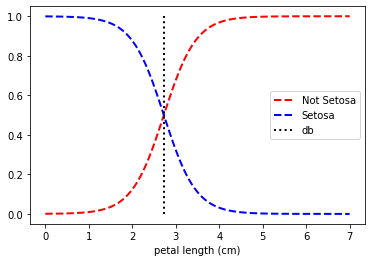

In [20]:
plt.plot(X_pred, y_prob[:, 0], "--r", lw=2, label="Not Setosa")
plt.plot(X_pred, y_prob[:, 1], "--b", lw=2, label="Setosa")
plt.plot([db, db], [0, 1], "k:", lw=2, label="db")
plt.xlabel("petal length (cm)")
plt.legend()

In [21]:
lr.predict([[2.5], [2.8], [3.5]])

array([ True, False, False])

In [22]:
X = iris_df.data[["petal length (cm)", "petal width (cm)"]].values
y = iris_df.target_names[iris_df.target] == "setosa"
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=40)

In [23]:
lr = LogisticRegression(random_state=40)
lr.fit(X, y)

LogisticRegression(random_state=40)

In [24]:
petal_length, petal_width = np.meshgrid(
    np.linspace(0, 7, 1000).reshape(-1, 1),
    np.linspace(0, 3, 1000).reshape(-1, 1)
)

In [25]:
petal_length.shape

(1000, 1000)

In [26]:
petal_length.flatten().shape

(1000000,)

In [27]:
X_pred = np.c_[petal_length.flatten(), petal_width.flatten()]

In [28]:
X_pred.shape

(1000000, 2)

In [29]:
y_prob = lr.predict_proba(X_pred)

In [30]:
y_prob.shape

(1000000, 2)

In [31]:
y_prob_2d = y_prob[:, 1].reshape(petal_length.shape)

In [32]:
import matplotlib as mpl

In [33]:
lr.classes_

array([False,  True])

In [34]:
X_pred[y_prob[:, 0] >= 0.5]

array([[3.02702703, 0.        ],
       [3.03403403, 0.        ],
       [3.04104104, 0.        ],
       ...,
       [6.98598599, 3.        ],
       [6.99299299, 3.        ],
       [7.        , 3.        ]])

In [35]:
lr.coef_

array([[-2.59326344, -1.07701465]])

In [37]:
lr.intercept_

array([7.83218783])

In [38]:
petal_length_vector = np.array([0, 7])
db = -((lr.intercept_ + lr.coef_[0, 0]*petal_length_vector)/lr.coef_[0, 1])

In [39]:
db

array([ 7.27212744, -9.58265167])

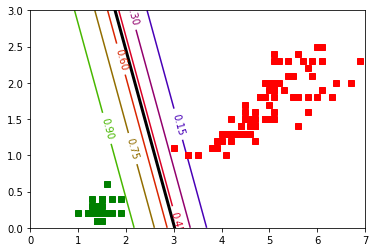

In [47]:
fig, ax = plt.subplots()
ax1 = ax.contour(petal_length,
                 petal_width,
                 y_prob[:, 1].reshape(petal_length.shape),
                 cmap=plt.cm.brg)
plt.clabel(ax1)
plt.plot(petal_length_vector, db, "k", lw=3)
plt.axis([0, 7, 0, 3])
plt.plot(X_train[y_train == 1, 0], X_train[y_train == 1, 1], "gs")
plt.plot(X_train[y_train == 0, 0], X_train[y_train == 0, 1], "rs")

## Softmax

In [48]:
X = iris_df.data[["petal length (cm)", "petal width (cm)"]].values
y = iris_df["target"]
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=40)

In [50]:
lr = LogisticRegression(random_state=40)
lr.fit(X_train, y_train)

LogisticRegression(random_state=40)

In [54]:
lr.predict([[2, 2]])

array([0])

In [55]:
lr.predict_proba([[2, 2]])

array([[8.20726287e-01, 1.78864822e-01, 4.08891732e-04]])